In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

In [2]:
# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [5]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [6]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how= 'left', on='Mouse ID' )
#Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice.
mice_total = combined_data.groupby('Mouse ID').count()
mice_total

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [8]:
mice_total = print(len(mice_total))

249


In [9]:
combined_data.duplicated().sum()

1

In [10]:
combined_data['Mouse ID'].duplicated()

0       False
1        True
2        True
3        True
4        True
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Name: Mouse ID, Length: 1893, dtype: bool

In [11]:
combined_data['Timepoint'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Name: Timepoint, Length: 1893, dtype: bool

In [12]:
duplicated_data = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicated_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(['Mouse ID', 'Timepoint'])
clean_data                                                                            

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Checking the number of mice in the clean DataFrame.
total_mice = clean_data.groupby('Mouse ID').count()
total_mice

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [15]:
print(len(total_mice))

249


In [16]:
##Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


In [18]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [19]:
mean = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [20]:
median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [21]:
variance = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [22]:
standard_deviation = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
standard_deviation

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [23]:
sem = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [24]:
statistic_summary = pd.DataFrame({"Mean" : mean, "Median" : median, "Variance" : variance, "Standard Deviation": standard_deviation, "SEM" : sem})
statistic_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
agg_summary = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

In [27]:
time_point = clean_data.groupby(["Drug Regimen"])["Timepoint"].count()
time_point

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

<IPython.core.display.Javascript object>


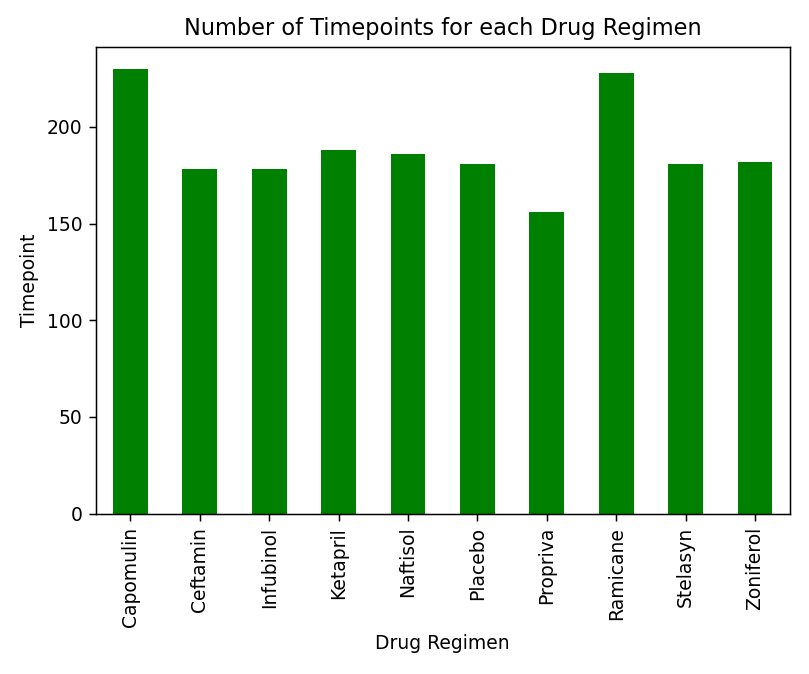

In [41]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
fig1, ax1 = plt.subplots(figsize=(6,5))
bar = time_point.plot(kind="bar", title="Number of Timepoints for each Drug Regimen", facecolor="green")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


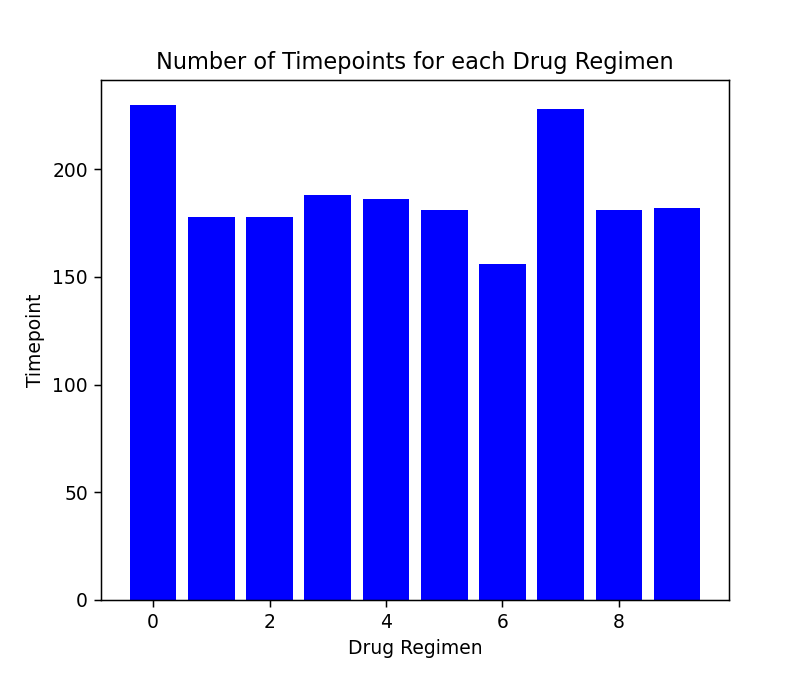

In [42]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
time_point = clean_data.groupby(["Drug Regimen"])["Timepoint"].count()
x_axis = np.arange(0, len(time_point))
tick_locations =[]
for x in x_axis:
    tick_locations.append(x)
fig2, ax2 = plt.subplots(figsize=(6,5))
plt.title("Number of Timepoints for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")
plt.bar(x_axis, time_point, facecolor="blue", align="center")
plt.show()

<IPython.core.display.Javascript object>


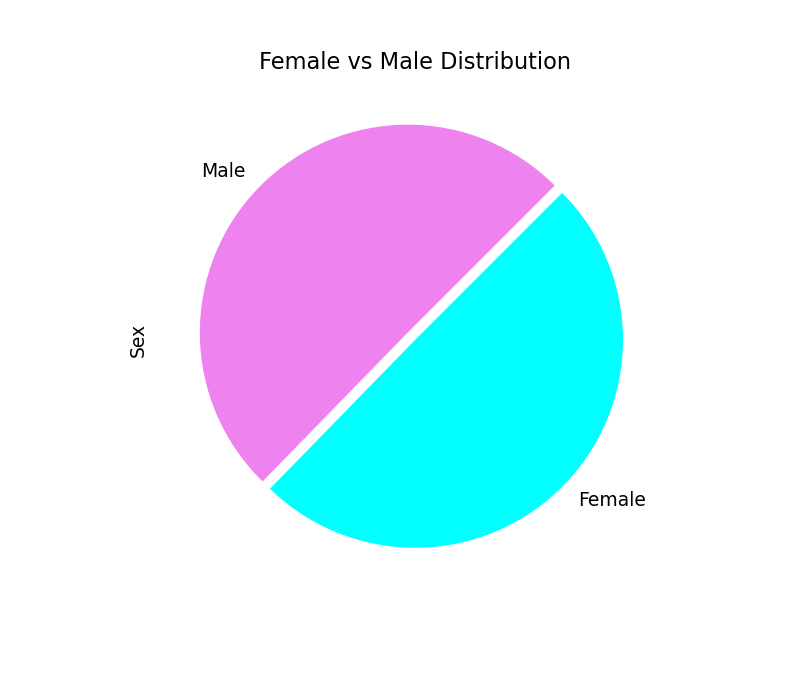

<function matplotlib.pyplot.show(*args, **kw)>

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = clean_data[["Mouse ID", "Sex"]].drop_duplicates()
colors = ["violet", "cyan"]
explode=(0.05,0)
fig3, ax3 = plt.subplots(figsize=(6,5))
sex_distribution = mouse_gender["Sex"].value_counts()
s = sex_distribution.plot(kind="pie", title="Female vs Male Distribution", colors=colors, startangle=45, explode=explode)
sex_distribution
plt.show

<IPython.core.display.Javascript object>


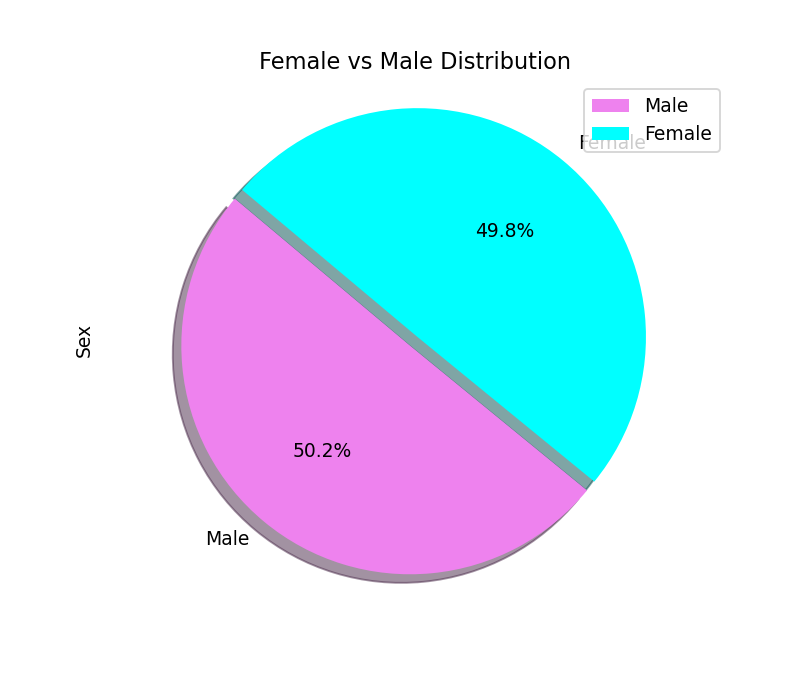

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig4, ax4 = plt.subplots(figsize=(6,5))
plt.pie(sex_distribution, labels=sex_distribution.index,colors=colors,autopct="%1.1f%%", shadow=True, startangle=140, explode=explode)
plt.axis("equal")
plt.title("Female vs Male Distribution")
plt.ylabel("Sex")
plt.legend(loc= "upper right")
plt.show()

In [32]:
###Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [34]:
# Start by getting the last (greatest) timepoint for each mouse

In [45]:
timepoint_max = clean_data.groupby("Mouse ID")["Timepoint"].max()
timepoint_max

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [46]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
volume_data = pd.merge(clean_data, timepoint_max, how="inner", on=["Mouse ID", "Timepoint"])
volume_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [48]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume = []

In [50]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds

In [51]:
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
for drug in drug_list:
    volume = volume_data.loc[volume_data["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_volume.append(volume) 
    quartiles = volume.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
print(f"The lower quartile  is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range  is: {iqr}")
print(f"The the median of is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile  is: 48.72207785
The upper quartile is: 64.29983003
The interquartile range  is: 15.577752179999997
The the median of is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [52]:
quartiles = volume.quantile([0.25,0.5,0.75])
quartiles

0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64

<IPython.core.display.Javascript object>


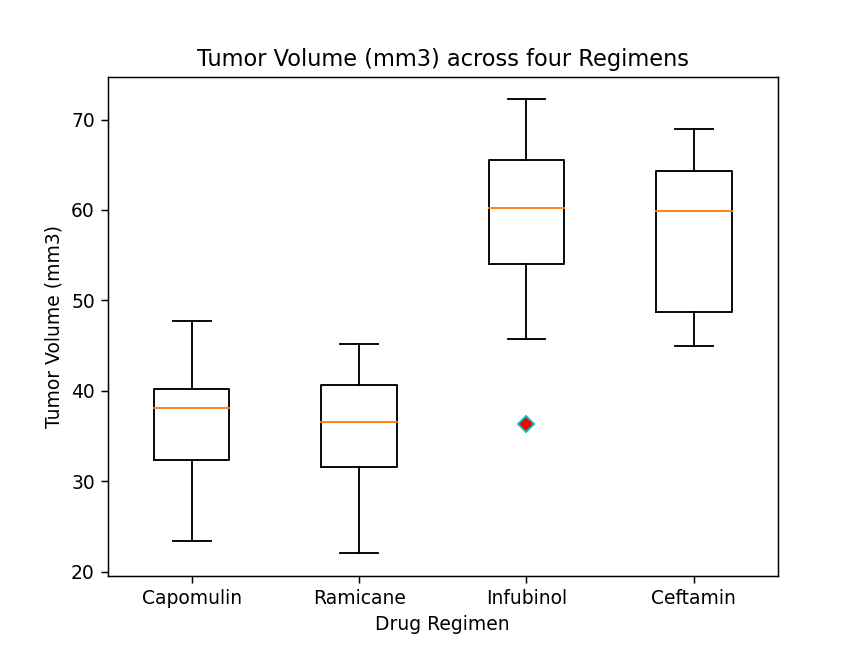

In [53]:
   # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig5, ax5 = plt.subplots()
red_dot = dict(markerfacecolor="r",marker="D", markeredgecolor="c")
ax5.boxplot(tumor_volume, flierprops=red_dot)
ax5.set_title("Tumor Volume (mm3) across four Regimens")
ax5.set_xlabel("Drug Regimen")
ax5.set_ylabel("Tumor Volume (mm3)")
ax5.xaxis.set(ticks=range(1,len(drug_list) + 1),ticklabels=drug_list)

plt.show()

In [54]:
#Line and Scatter Plots
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
campomulin_sample = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "s185",:]
campomulin_sample.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


<IPython.core.display.Javascript object>


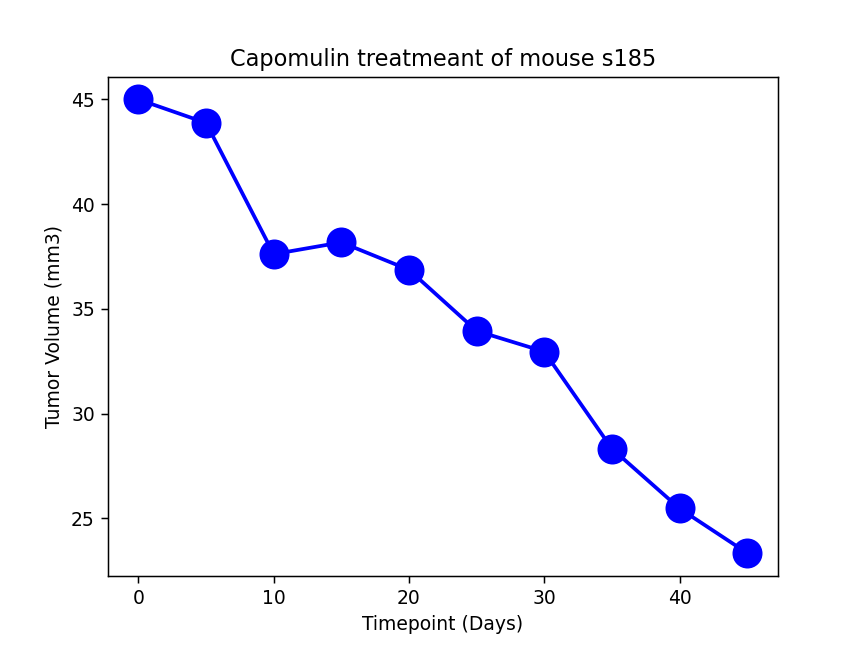

Text(0, 0.5, 'Tumor Volume (mm3)')

In [55]:
x_axis = campomulin_sample["Timepoint"]
tumor_sample = campomulin_sample["Tumor Volume (mm3)"]

fig6, ax6 = plt.subplots()
plt.title('Capomulin treatmeant of mouse s185')
plt.plot(x_axis, tumor_sample,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

In [56]:
avg_capomulin_volume =Capomulin_df.groupby(['Mouse ID']).mean()
avg_capomulin_volume

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


<IPython.core.display.Javascript object>


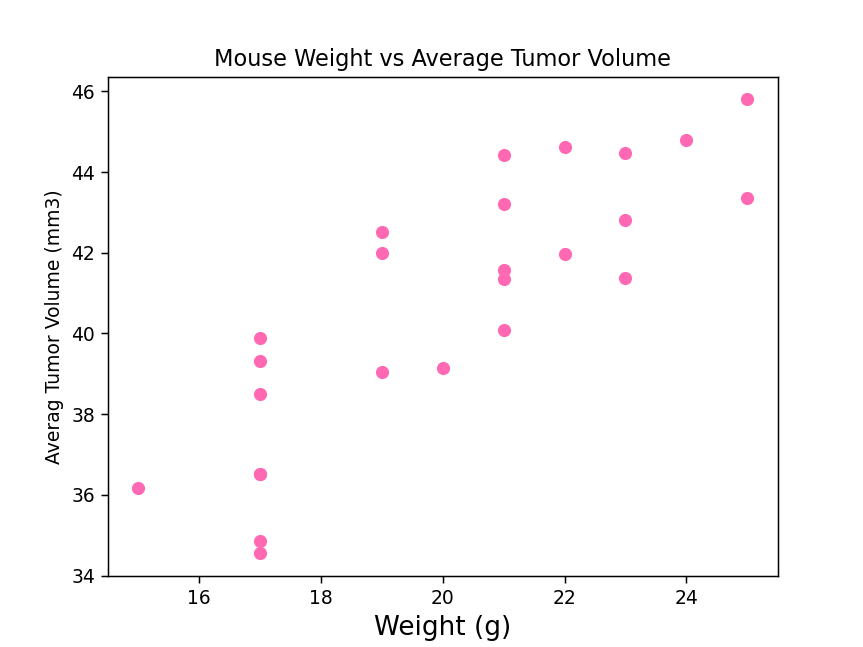

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

In [57]:
fig7, ax7 = plt.subplots()
marker_size=15
plt.scatter(avg_capomulin_volume['Weight (g)'],avg_capomulin_volume['Tumor Volume (mm3)'], color="hotpink")
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

In [ ]:
#Correlation and Regression
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capomulin_volume['Weight (g)'],avg_capomulin_volume['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

<IPython.core.display.Javascript object>


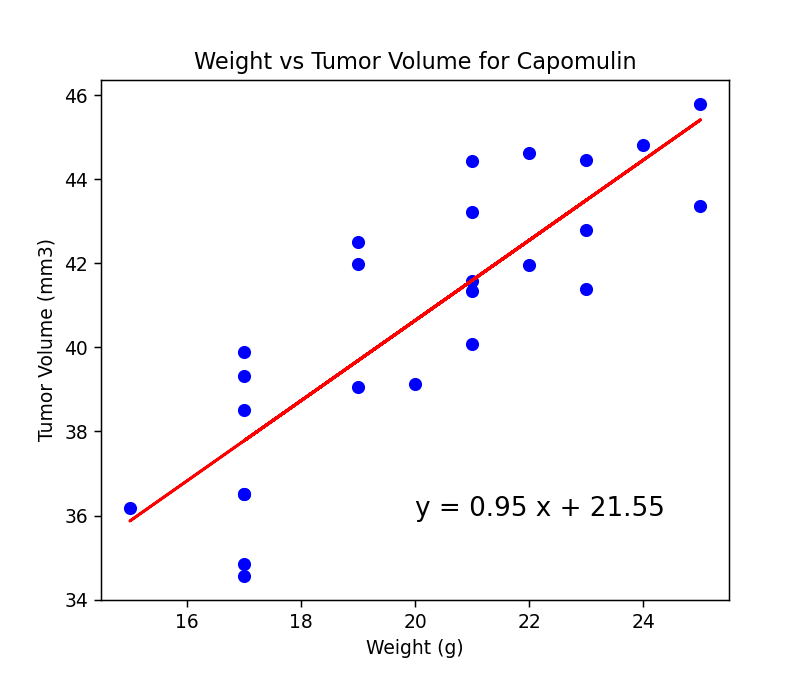

The r-squared is: 0.709


In [58]:
slope, intercept,rvalue, pvalue, stderr = stats.linregress(avg_capomulin_volume["Weight (g)"], avg_capomulin_volume["Tumor Volume (mm3)"])
regress_values = avg_capomulin_volume["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
fig8, ax8 = plt.subplots(figsize=(6,5))
plt.scatter(avg_capomulin_volume["Weight (g)"],avg_capomulin_volume["Tumor Volume (mm3)"],color='b')
plt.plot(avg_capomulin_volume["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()